In [1]:
%matplotlib inline

In [2]:
from time import time
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.datasets import fetch_20newsgroups
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import MeanShift
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn import mixture


categories = [
    'alt.atheism',
    'talk.religion.misc',
    'comp.graphics',
    'sci.space',
]
# Uncomment the following to do the analysis on all the categories
# categories = None

print("Loading 20 newsgroups dataset for categories:")
print(categories)

dataset = fetch_20newsgroups(subset='all', categories=categories,
                             shuffle=True, random_state=42)

print("%d documents" % len(dataset.data))
print("%d categories" % len(dataset.target_names))
print()

labels = dataset.target
true_k = np.unique(labels).shape[0]
vectorizer = TfidfVectorizer(max_df=0.5, max_features=10000,min_df=2, 
                             stop_words='english')
data=vectorizer.fit_transform(dataset.data)

svd = TruncatedSVD(2)
normalizer = Normalizer(copy=False)
lsa = make_pipeline(svd, normalizer)
data= lsa.fit_transform(data)



# print("n_digits: %d, \t n_samples %d, \t n_features %d"
#       % (n_digits, n_samples, n_features))

print('%-20s\t%-5s\t%-5s\t%-5s\t%-5s'%("init","time","NMI","Homo","Cpl"))
# print(digits)
def evalution(estimator,name,data):
    t0 = time()
    y_pred=estimator.fit_predict(data)
    print('%-20s\t%.2fs\t%.3f\t%.3f\t%.3f'
          % (name, (time() - t0),
             metrics.normalized_mutual_info_score(labels,y_pred),
             metrics.homogeneity_score(labels, y_pred),
             metrics.completeness_score(labels, y_pred)
             ))

evalution(KMeans(init='random', n_clusters=4, n_init=4),
              name="KMeans", data=data)

evalution(AffinityPropagation(),name="AffinityPropagation",data=data)

evalution(MeanShift(bandwidth=0.0751),name="MeanShift",data=data)

evalution(SpectralClustering(n_clusters=4,
                             assign_labels="discretize",
                             random_state=0,
                             affinity="nearest_neighbors"),
          name="SpectralClustering",
          data=data)

evalution(AgglomerativeClustering(linkage="ward", n_clusters=4),name="AgglomerativeClustering",data=data)

evalution(AgglomerativeClustering(n_clusters=4),name="AgglomerativeClustering",data=data)

evalution(DBSCAN(eps=0.02, min_samples=40),name="DBSCAN",data=data)

evalution(mixture.GaussianMixture(n_components=4, covariance_type='full'),name="GaussianMixture",data=data)

 

Loading 20 newsgroups dataset for categories:
['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
3387 documents
4 categories

init                	time 	NMI  	Homo 	Cpl  
KMeans              	0.03s	0.443	0.441	0.445
AffinityPropagation 	40.66s	0.397	0.906	0.174
MeanShift           	29.20s	0.457	0.439	0.475
SpectralClustering  	4.63s	0.433	0.427	0.439
AgglomerativeClustering	0.27s	0.458	0.446	0.470
AgglomerativeClustering	0.23s	0.458	0.446	0.470
DBSCAN              	0.02s	0.462	0.381	0.560
GaussianMixture     	0.02s	0.439	0.438	0.441


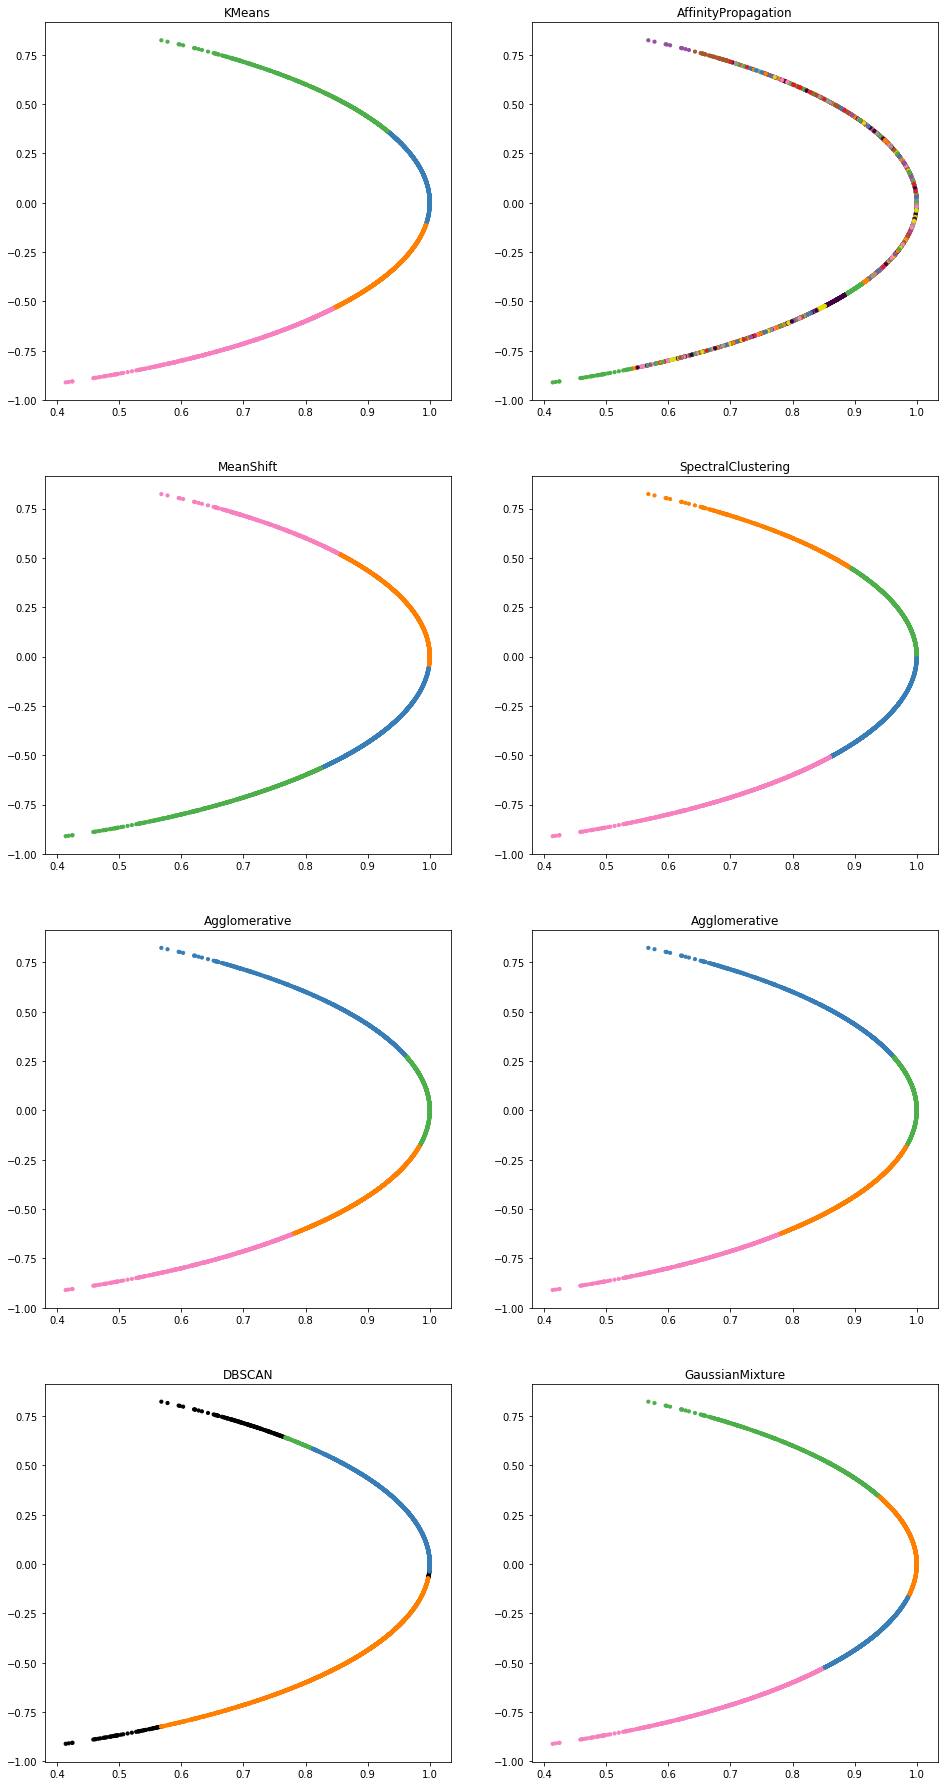

In [3]:
from itertools import cycle, islice
reduced_data = data
fig = plt.figure(figsize=(16, 32))


def draw_image(algorithm,X,pos,name):
    if hasattr(algorithm, 'labels_'):
        y_pred = algorithm.labels_.astype(np.int)
    else:
        y_pred = algorithm.predict(X)

    plt.subplot(4, 2, pos)
    colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00','#400040']),
                                      int(max(y_pred) + 1))))
    colors = np.append(colors, ["#000000"])
    plt.title(name)
    plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])
    
    
pos=1
estimator=KMeans(init='random', n_clusters=4, n_init=4)
estimator.fit(reduced_data)
draw_image(estimator,reduced_data,pos=pos,name="KMeans")

pos+=1
estimator=AffinityPropagation()
estimator.fit(reduced_data)
draw_image(estimator,reduced_data,pos=pos,name="AffinityPropagation")

pos+=1
estimator=MeanShift(bandwidth=0.0751)
estimator.fit(reduced_data)
draw_image(estimator,reduced_data,pos=pos,name="MeanShift")

pos+=1
estimator=SpectralClustering(n_clusters=4,
                             assign_labels="discretize",
                             random_state=0,
                             affinity="nearest_neighbors")
estimator.fit(reduced_data)
draw_image(estimator,reduced_data,pos=pos,name="SpectralClustering") 

pos+=1
estimator=AgglomerativeClustering(linkage="ward", n_clusters=4)
estimator.fit(reduced_data)
draw_image(estimator,reduced_data,pos=pos,name="Agglomerative") 

pos+=1
estimator=AgglomerativeClustering(linkage="ward", n_clusters=4)
estimator.fit(reduced_data)
draw_image(estimator,reduced_data,pos=pos,name="Agglomerative") 

pos+=1
estimator=DBSCAN(eps=0.02, min_samples=40)
estimator.fit(reduced_data)
draw_image(estimator,reduced_data,pos=pos,name="DBSCAN") 

pos+=1
estimator = mixture.GaussianMixture(
        n_components=4, covariance_type='full')
estimator.fit(reduced_data)
draw_image(estimator,reduced_data,pos=pos,name="GaussianMixture") 


fig.savefig("document.jpg")

